## INTRODUCTION

This case study is the capstone Project of **Google Data Analytics Professional Certificate.**

Title: **Bellabeat Case Study**

Author: Ukoha Victor Ukegbu

Date: 22 Dec 2022







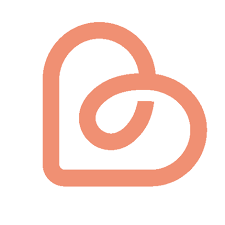







# BELLABEAT CASE STUDY 

*How can a wellness technology company play it smart?*









### ABOUT THE COMPANY

Bellabeat is a high-tech manufacturer of health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.
Chief Creative Officer, Urška Sršen, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

### BUSINESS TASK
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends for marketing strategy.


### STAKEHOLDERS
- Urška Sršen – Bellabeat’s cofounder and Chief Creative Officer.


- Sando Mur – Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.


- Bellabeat marketing analytics team – A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

### (1) ASK
1. What are some trends in smart device usage?


2. How could these trends apply to Bellabeat customers?


3. How could these trends help influence Bellabeat marketing strategy?

### (2) PREPARE

#### About the data
1. This public dataset is available on [Kaggle](https://www.kaggle.com/arashnic/fitbit) and comprises of 18 CSV files – each containing specific tracking information, such as daily calories, daily steps, etc


2. The dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk and comprehends dates between 03-12-2016 and 05-12-2016.


3. Thirty FitBit users consented to the submission of their personal tracker data – which includes a minute-level output for physical activity, heart rate, and sleep monitoring.


4. With regards to data bias, it is important to note that the data isn’t a perfect representation of all FitBit users.

### (3) PROCESS
Python is used to prepare and process the data. We start by **loading the libraries and datasets.**

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt 

In [2]:
#reading the selected files with read_csv function
daily_activity = pd.read_csv(r'C:\Users\dailyActivity_merged.csv')
hourly_calories = pd.read_csv(r'C:\Users\hourlyCalories_merged.csv')
hourly_steps = pd.read_csv(r'C:\Users\hourlySteps_merged.csv')
sleep = pd.read_csv(r'C:\Users\sleepDay_merged.csv')


---
### Data Exploration

#### Preview the imported datasets using the head function

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [5]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [6]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
#Overview of the first (15) records
daily_activity.head(15)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


---
#### Lets find out if there are null or missing values in each dataset

In [8]:
#Checking and removing null or missing values.
daily_activity.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

In [9]:
hourly_calories.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

In [10]:
hourly_steps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

In [11]:
sleep.isnull().any()

Id                    False
SleepDay              False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
dtype: bool

---
#### Lets find out if there are duplicate records in each dataset

In [12]:
#Lets remove duplicate records
daily_activity.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [13]:
hourly_calories.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [15]:
hourly_steps.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [16]:
sleep.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
408    False
409    False
410    False
411    False
412    False
Length: 413, dtype: bool

---
#### Lets find out the number of unique ID of each dataset

In [18]:
#Lets get the distinct number of unique id
id_unique = len(pd.unique(daily_activity["Id"]))
id_hour_cal = len(pd.unique(hourly_calories["Id"]))
id_hour_st = len(pd.unique(hourly_steps["Id"]))
id_sleep = len(pd.unique(sleep["Id"]))

#Lets display the number of unique id for each dataframe
print("No. of daily_activity Id: " + str(id_unique))
print("No. of Hourly_Calories Id: " + str(id_hour_cal))
print("No. of Hourly_Steps Id: " + str(id_hour_st))
print("No. of Sleep Id: " + str(id_sleep))


No. of daily_activity Id: 33
No. of Hourly_Calories Id: 33
No. of Hourly_Steps Id: 33
No. of Sleep Id: 24


---
#### Lets find out the Data types of each dataset

In [19]:
daily_activity.dtypes #.dtypes function is used to check the datatypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [20]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [21]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [22]:
sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

---
### Data Transformation

Let's transform certain aspects of the data.


In [23]:
#Lets Rename these columns for proper readabilty

daily_activity = daily_activity.rename(columns={'ActivityDate' : 'Date'})
hourly_calories = hourly_calories.rename(columns={'ActivityHour' : 'Time'})
hourly_steps = hourly_steps.rename(columns={'ActivityHour' : 'Time'})
sleep = sleep.rename(columns={'SleepDay' : 'Date'})

In [24]:
# Lets convert the date columns in all dataframe to DATETIME 

daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])
hourly_calories['Time'] = pd.to_datetime(hourly_calories['Time'])
hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'])
sleep['Date'] = pd.to_datetime(sleep['Date'])

In [25]:
#Lets add a "DAY OF THE WEEK" column to represent the days of the week

daily_activity['DayOfTheWeek'] = daily_activity['Date'].dt.day_name()
hourly_calories['DayOfTheWeek'] = hourly_calories['Time'].dt.day_name()


---
### Dataset Merging
Here we combine our dataset to help in finding trends from the data.

In [26]:
#Lets combine the daily_activity and sleep as a single dataframe
merged_daily = pd.merge(daily_activity, sleep, on='Date')

merged_daily.head()

,Id_x,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,4020332650,1,501,541


In [32]:
#Lets rename columns 'Id_x' and 'Id_y' for readabilty purpose
merged_daily = merged_daily.rename(columns={'Id_x' : 'Id_Activity'}) #renaming the "Id_x" to 'Id_daily'
merged_daily = merged_daily.rename(columns={'Id_y' : 'Id_sleep'}) #renaming the "Id_y" to "Id_Sleep"
merged_daily.head()

,Id_Activity,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,Id_Sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,4020332650,1,501,541


In [34]:
# Merging hourly_steps and hourly_calories datasets
merged_hours = pd.merge(hourly_steps, hourly_calories, on=['Time', 'Id'])
merged_hours.head(5)

,Id,Time,StepTotal,Calories,DayOfTheWeek
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


### (4) ANALYZE


Now we will group data to perform calculations and answer crucial questions.


#### Overview of the General statistics of the merged_daily

In [35]:
merged_daily.describe()

,Id_Activity,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Id_Sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,1.262500e+04,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,1.262500e+04,12625.000000,12625.000000,12625.000000
mean,4.860788e+09,7677.291564,5.516843,5.502480,0.105511,1.507958,0.570082,3.360555,0.001589,21.265822,13.660436,194.197545,992.791446,2315.398495,4.999624e+09,1.121663,419.308990,458.611327
std,2.422565e+09,5106.688864,3.942622,3.925480,0.614377,2.686800,0.882671,2.044217,0.007336,33.115259,20.030390,109.087189,298.075854,710.280611,2.062533e+09,0.349851,118.507042,127.342981
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.503960e+09,1.000000,58.000000,61.000000
25%,2.320127e+09,3821.000000,2.630000,2.630000,0.000000,0.000000,0.000000,1.960000,0.000000,0.000000,0.000000,129.000000,730.000000,1838.000000,3.977334e+09,1.000000,361.000000,403.000000
50%,4.445115e+09,7412.000000,5.260000,5.260000,0.000000,0.210000,0.240000,3.380000,0.000000,4.000000,7.000000,199.000000,1057.000000,2150.000000,4.702922e+09,1.000000,432.000000,463.000000
75%,6.962181e+09,10735.000000,7.720000,7.720000,0.000000,2.040000,0.810000,4.790000,0.000000,32.000000,20.000000,266.000000,1229.000000,2796.000000,6.962181e+09,1.000000,490.000000,526.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,8.792010e+09,3.000000,796.000000,961.000000


1. The total steps taken by the users on an average is 7677 steps and at an average distance of 5.4 km.
2. The users spend 992 minutes sedentary (idle) on an average which is 16 hours 32 minutes. This means that active minutes is 448 which is 7 hours 28 minutes.
3. The users burnt an average of 2315 calories which is equivalent to 0.3kg or 0.6Lb.

In [39]:
from pandas.api.types import CategoricalDtype

### Average of Total Minutes Asleep And Total Time In Bed By Day Of The Week
*How long does Users Spend Asleep and in Bed?* *Do they go to Bed immediately?*

In [41]:
cat_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cat_week, ordered=True)
merged_daily['DayOfTheWeek'] = merged_daily['DayOfTheWeek'].astype(cat_type)
df_weekday = merged_daily.copy().groupby(merged_daily['DayOfTheWeek']).mean().reindex(cat_week)
df_weekday.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])

C:\Users\geezi\AppData\Local\Temp\ipykernel_8740\1020415544.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday = merged_daily.copy().groupby(merged_daily['DayOfTheWeek']).mean().reindex(cat_week)


,TotalMinutesAsleep,TotalTimeInBed
DayOfTheWeek,,
Monday,418.245390,455.711348
Tuesday,404.815617,443.471033
Wednesday,434.566434,470.421578
Thursday,401.504069,435.150560
Friday,405.504155,445.150693
Saturday,420.766537,461.246804
Sunday,453.702051,504.556695


In [42]:
df_weekday.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])

,TotalMinutesAsleep,TotalTimeInBed
DayOfTheWeek,,
Monday,418.245390,455.711348
Tuesday,404.815617,443.471033
Wednesday,434.566434,470.421578
Thursday,401.504069,435.150560
Friday,405.504155,445.150693
Saturday,420.766537,461.246804
Sunday,453.702051,504.556695


---
### Average of Calories Burnt By Day Of The Week
*What day of the week do the users burn more calories? Do users burn more calories on weekdays or weekends?*

In [43]:
df_weekday.filter(['Calories'])

,Calories
DayOfTheWeek,
Monday,2323.145390
Tuesday,2355.894710
Wednesday,2308.711788
Thursday,2269.124110
Friday,2330.701385
Saturday,2356.045025
Sunday,2262.509047


In [44]:
df_weekday.filter(['TotalSteps'])

,TotalSteps
DayOfTheWeek,
Monday,7755.040426
Tuesday,8115.021662
Wednesday,7593.504995
Thursday,7651.824517
Friday,7449.285319
Saturday,8159.764314
Sunday,6943.197226


---
### Most Active Time Of The Day
*At what time of the day are Users most active? Are they more active in the Morning or Evening hours?*

In [45]:
merged_hours.groupby(merged_hours['Time'].dt.hour)['Calories'].mean()

Time
0      71.805139
1      70.165059
2      69.186495
3      67.538049
4      68.261803
5      81.708155
6      86.996778
7      94.477981
8     103.337272
9     106.142857
10    110.460710
11    109.806904
12    117.197397
13    115.309446
14    115.732899
15    106.637158
16    113.327453
17    122.752759
18    123.492274
19    121.484547
20    102.357616
21     96.056354
22     88.265487
23     77.593577
Name: Calories, dtype: float64

---
### Avg. Total Steps By Time of the Day
*What time do Users take the Most and Least steps daily? Do they prefer to walk mostly in the Morning or Afternoon?*

In [47]:
merged_hours.groupby(merged_hours['Time'].dt.hour)['StepTotal'].mean() #Grouped by the Time of the day in Ascending order

Time
0      42.188437
1      23.102894
2      17.110397
3       6.426581
4      12.699571
5      43.869099
6     178.508056
7     306.049409
8     427.544576
9     433.301826
10    481.665231
11    456.886731
12    548.642082
13    537.698154
14    540.513572
15    406.319126
16    496.845645
17    550.232892
18    599.169978
19    583.390728
20    353.905077
21    308.138122
22    237.987832
23    122.132890
Name: StepTotal, dtype: float64

## (5) SHARE

In the __SHARE__, we will create vizualizations to convene the findings of our analysis.

### Viz.Total Steps and Calories


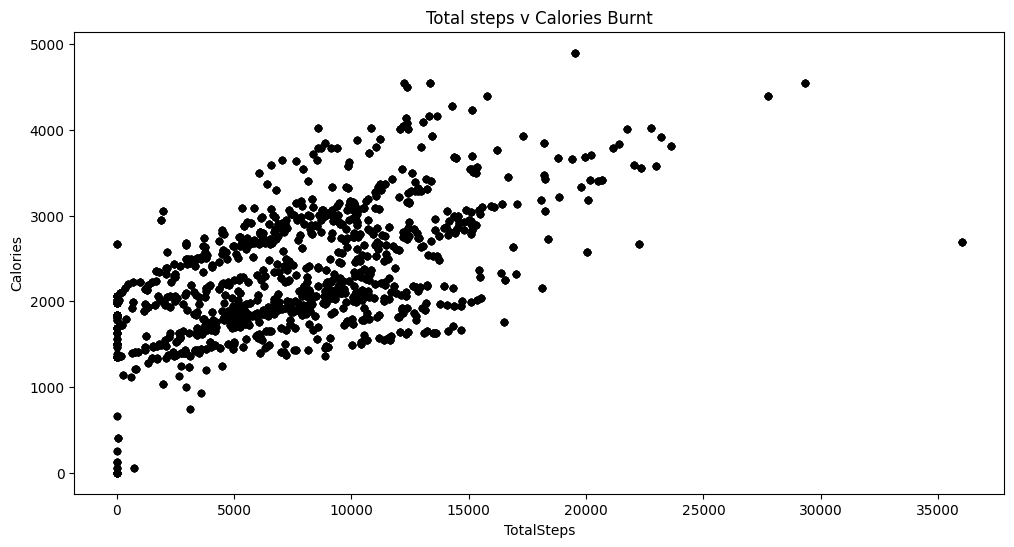

In [48]:
merged_daily.plot.scatter(x='TotalSteps', y='Calories', color='black', alpha=0.5, figsize=(12,6))
plt.title('Total steps v Calories Burnt')
plt.show()



#### DISCOVERY:
1. There is a positive correlation between the two variables. The greater the steps taken, the more calories users burn.
2. Users burn mostly 1000 to 3000 calories as the steps taken range from 0 to 15,000.

### Viz. Time in Bed and Time Asleep

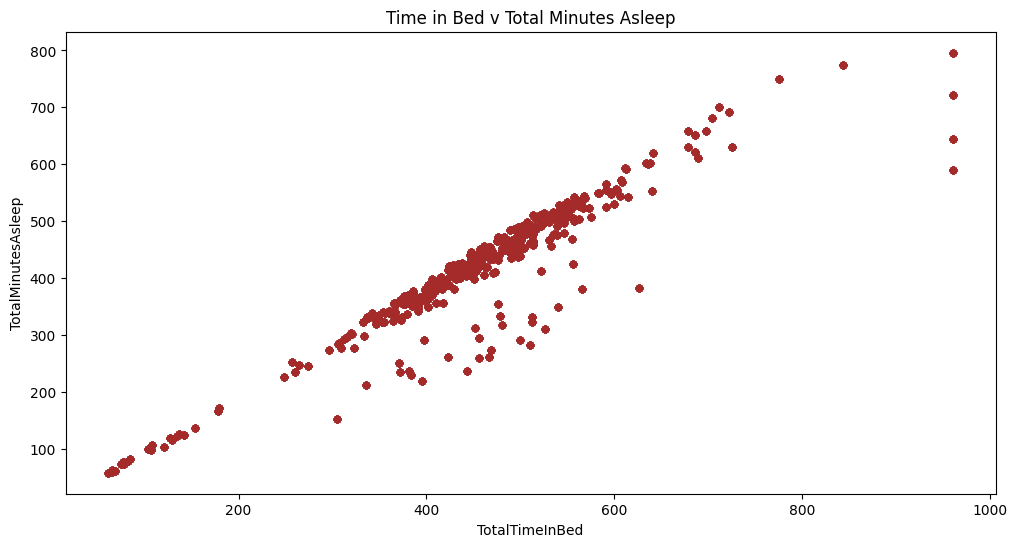

In [51]:
merged_daily.plot.scatter(x='TotalTimeInBed', y='TotalMinutesAsleep', color='brown', alpha=0.5, figsize=(12,6))
plt.title('Time in Bed v Total Minutes Asleep')
plt.show()

#### DISCOVERY:
1. There is a __strong__ correlation between the two variables.
2. Majority of users are only in bed when they are sleeping but there are few occassions when they spend larger amount of time in bed awake.

### Viz. Average Calories by Time of the Day

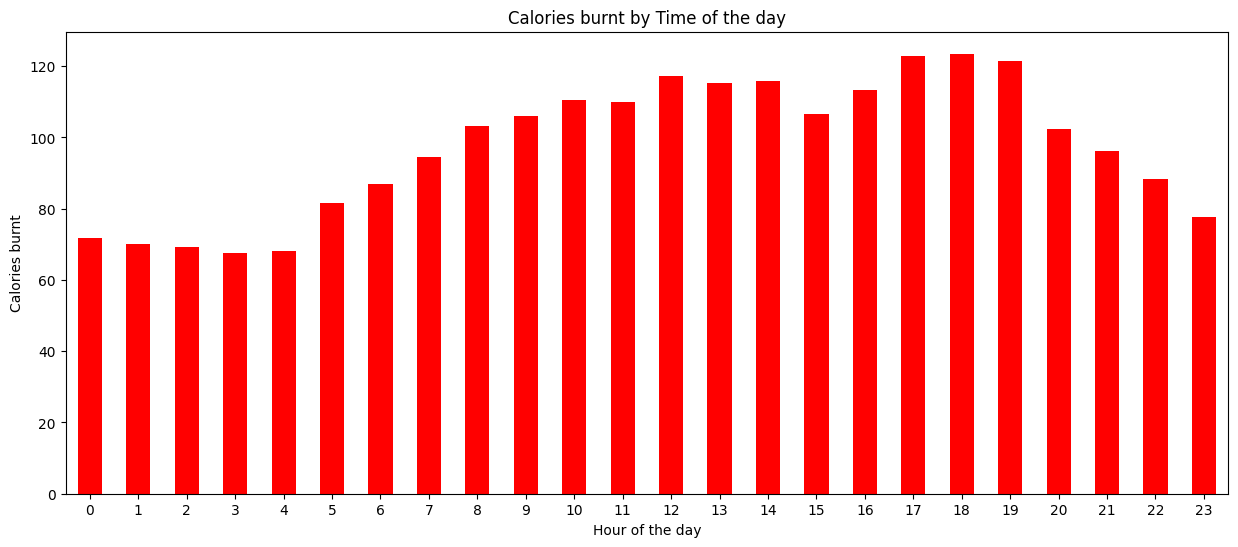

In [53]:
fig, axs = plt.subplots(figsize=(15, 6))
merged_hours.groupby(merged_hours['Time'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, color='red', title='Calories burnt by Time of the day')
plt.xlabel("Hour of the day")
plt.ylabel("Calories burnt")
plt.show()

#### DISCOVERY:
Users burn calories at all hours of the day and increases as they are more active.

### Viz. Busiest Time of The Day

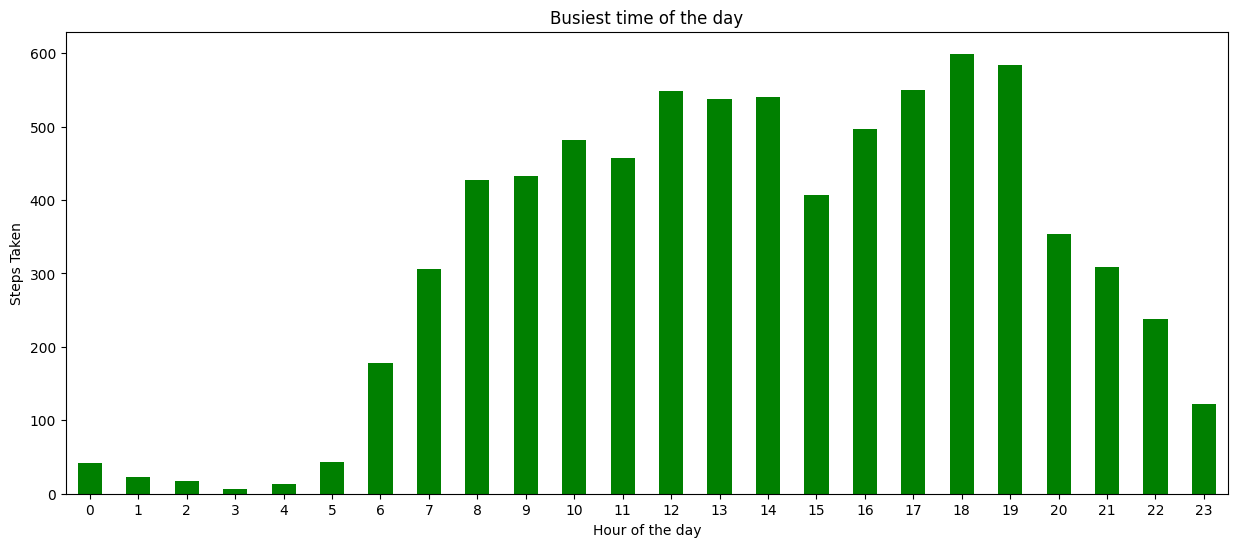

In [67]:
fig, axs = plt.subplots(figsize=(15, 6))
merged_hours.groupby(merged_hours['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='green', title='Busiest time of the day')
plt.xlabel("Hour of the day")
plt.ylabel("Steps Taken")
plt.show()

#### DISCOVERY:
1. Users start being active from 6am
2. The peak hours are between 12pm to 2pm and 5pm to 7pm.
3. Activity levels decline significantly from 8pm.
4. Activity levels are lowest from 12am to 5am.

### Percentage of Activity Minutes

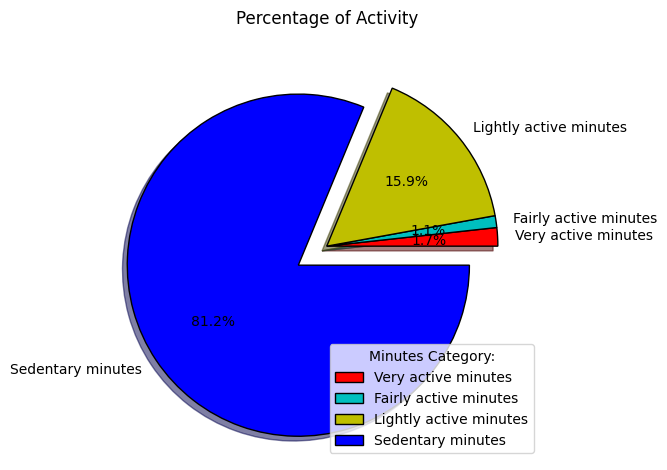

In [60]:
# Calculating sum of these minutes columns
very_active = merged_daily["VeryActiveMinutes"].sum()
fairly_active = merged_daily["FairlyActiveMinutes"].sum()
lightly_active = merged_daily["LightlyActiveMinutes"].sum()
sedentary = merged_daily["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active, fairly_active, lightly_active, sedentary]
my_labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
my_colours = ["r", "c", "y", "blue"]
my_explode = [0, 0, 0, 0.2]
plt.style.use("default")
plt.pie(slices, labels = my_labels, 
        colors = my_colours, shadow = True, wedgeprops = {"edgecolor": "black"}, 
        explode = my_explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity")
plt.legend(loc='lower right', title = "Minutes Category:")
plt.tight_layout()
plt.show()

#### DISCOVERY:
1. Sendentary minutes makes up 81.2%.
2. The active minutes make up a minor percentage of 18.8%.

### Viz. Total steps by Day of the Week

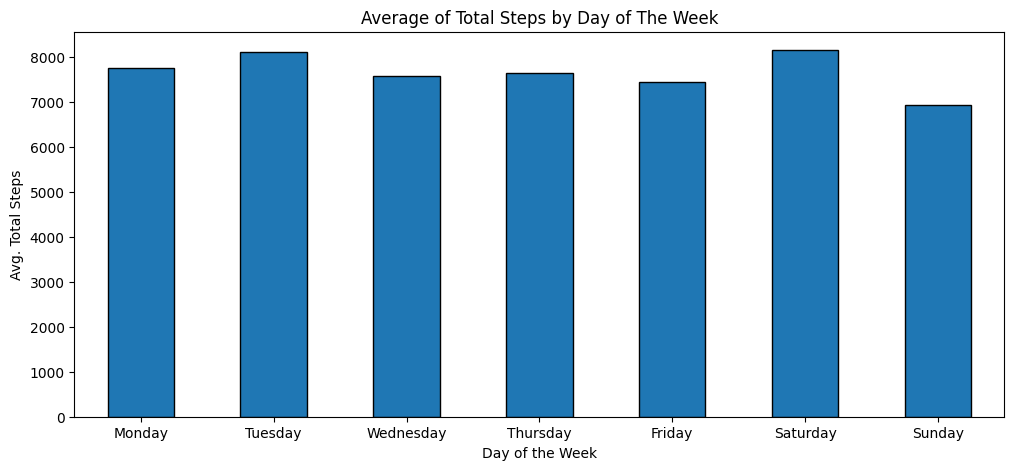

In [66]:
df_weekday['TotalSteps'].plot.bar(xlabel='Day of the Week', ylabel='Avg. Total Steps', title='Average of Total Steps by Day of The Week', edgecolor='black', rot=0, figsize=(12,5))
plt.show()

#### DISCOVERY:
1. The most active day is __Tuesday__ and __Saturday__.
2. The least active day is __Sunday__.

## (6) ACT
In this final phase, we will answer the key business question and  provide recommendations based on our analysis to guide Bellabeat's marketing strategy.

#### *What are some trends in smart device usage?*

-  Users spend **81.2%** of their time **Inactive**


-  There is a positive relationship between the total number of steps and the total number of burned calories. The **more steps** taken the **more calories burnt** by the User.


-  The Users start their day between 6 am and 8 am. They are **most active** between **12pm to 2pm and 5 pm to 7 pm,** and become less active at 8 pm.


- Users have an **average sleeping time** of **7 hours** per night with **Sunday** being the day Users slept **most**.



#### RECOMMENDATIONS
These recommendations below ensure that the Bellabeat's maerketing strategy is a success:

-  A **Timer** can be added in the Bella app to remind the users to take few steps after a certain period of inactivity.


-  A **Fitness challenge group** can be added as a new feature where friends or families of the user can compete and finish weekly goals especially on **weekends**, digital tokens can be rewarded to winners.


-  A **Short intense exercise** or **Jogging** should be incorporated as a feature especially in the **Morning** between 6am to 7 am since most users get active from this time interval. 


- A **Customer satisfaction survey** can be conducted weekly using tracked data from the previous week to assess the causes of inactive periods since user might be sick.


-  A **User Nearby** feature can be added as premium where users can search for a Running friend near their location. This feature is both fun for users and generates revenue for Bellabeat.